In [1]:
import xarray as xr
import glob
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
import sys
import scipy
sys.path.append("/home/qwertz/Dokumente/N_eigene_Dokumente/Geo_Met_MSc/Semester_4_5/Thesis_prep_Juni_23/MA/Notebooks/")
from Sc_module import convert_single_timestamp
from Sc_module import convert_to_float_timestamps
from Sc_module import ucla_time2useful_time
# from Sc_module import ucla_time2useful_time
plt.rc('font', size=12) 
myFmt = mdates.DateFormatter('%H:%M')
plt.style.use('seaborn-poster')

outputdir = "/home/qwertz/Dokumente/N_eigene_Dokumente/Geo_Met_MSc/Semester_4_5/Thesis_prep_Juni_23/MA/master_plots/18_UCLA_11_sims/"

######################################################

path = "/home/qwertz/UCLA/uclales/Runs/"

ds_ICON_unsharp_orig_div_ps = xr.open_dataset(path+"11_Mimic_ICON_unsharp_orig_div/rf01.ps.nc")
ds_ICON_unsharp_ps = xr.open_dataset(path+"11_Mimic_ICON_unsharp/rf01.ps.nc")
ds_ICON_unsharp_middiv_ps = xr.open_dataset(path+"11_Mimic_ICON_unsharp_middiv/rf01.ps.nc")
ds_ICON_sharp_orig_div_ps = xr.open_dataset(path+"11_Mimic_ICON_sharp_orig_div/rf01.ps.nc")
ds_ICON_sharp_middiv_ps = xr.open_dataset(path+"11_Mimic_ICON_sharp_middiv/rf01.ps.nc")
ds_ICON_sharp_ps = xr.open_dataset(path+"11_Mimic_ICON_sharp/rf01.ps.nc")


# ds_ICON_unsharp_middiv_ps = xr.open_dataset(path+" /rf01.ps.nc")
# ds_ICON_unsharp_middiv_ps = xr.open_dataset(path+" /rf01.ps.nc")

#######################


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


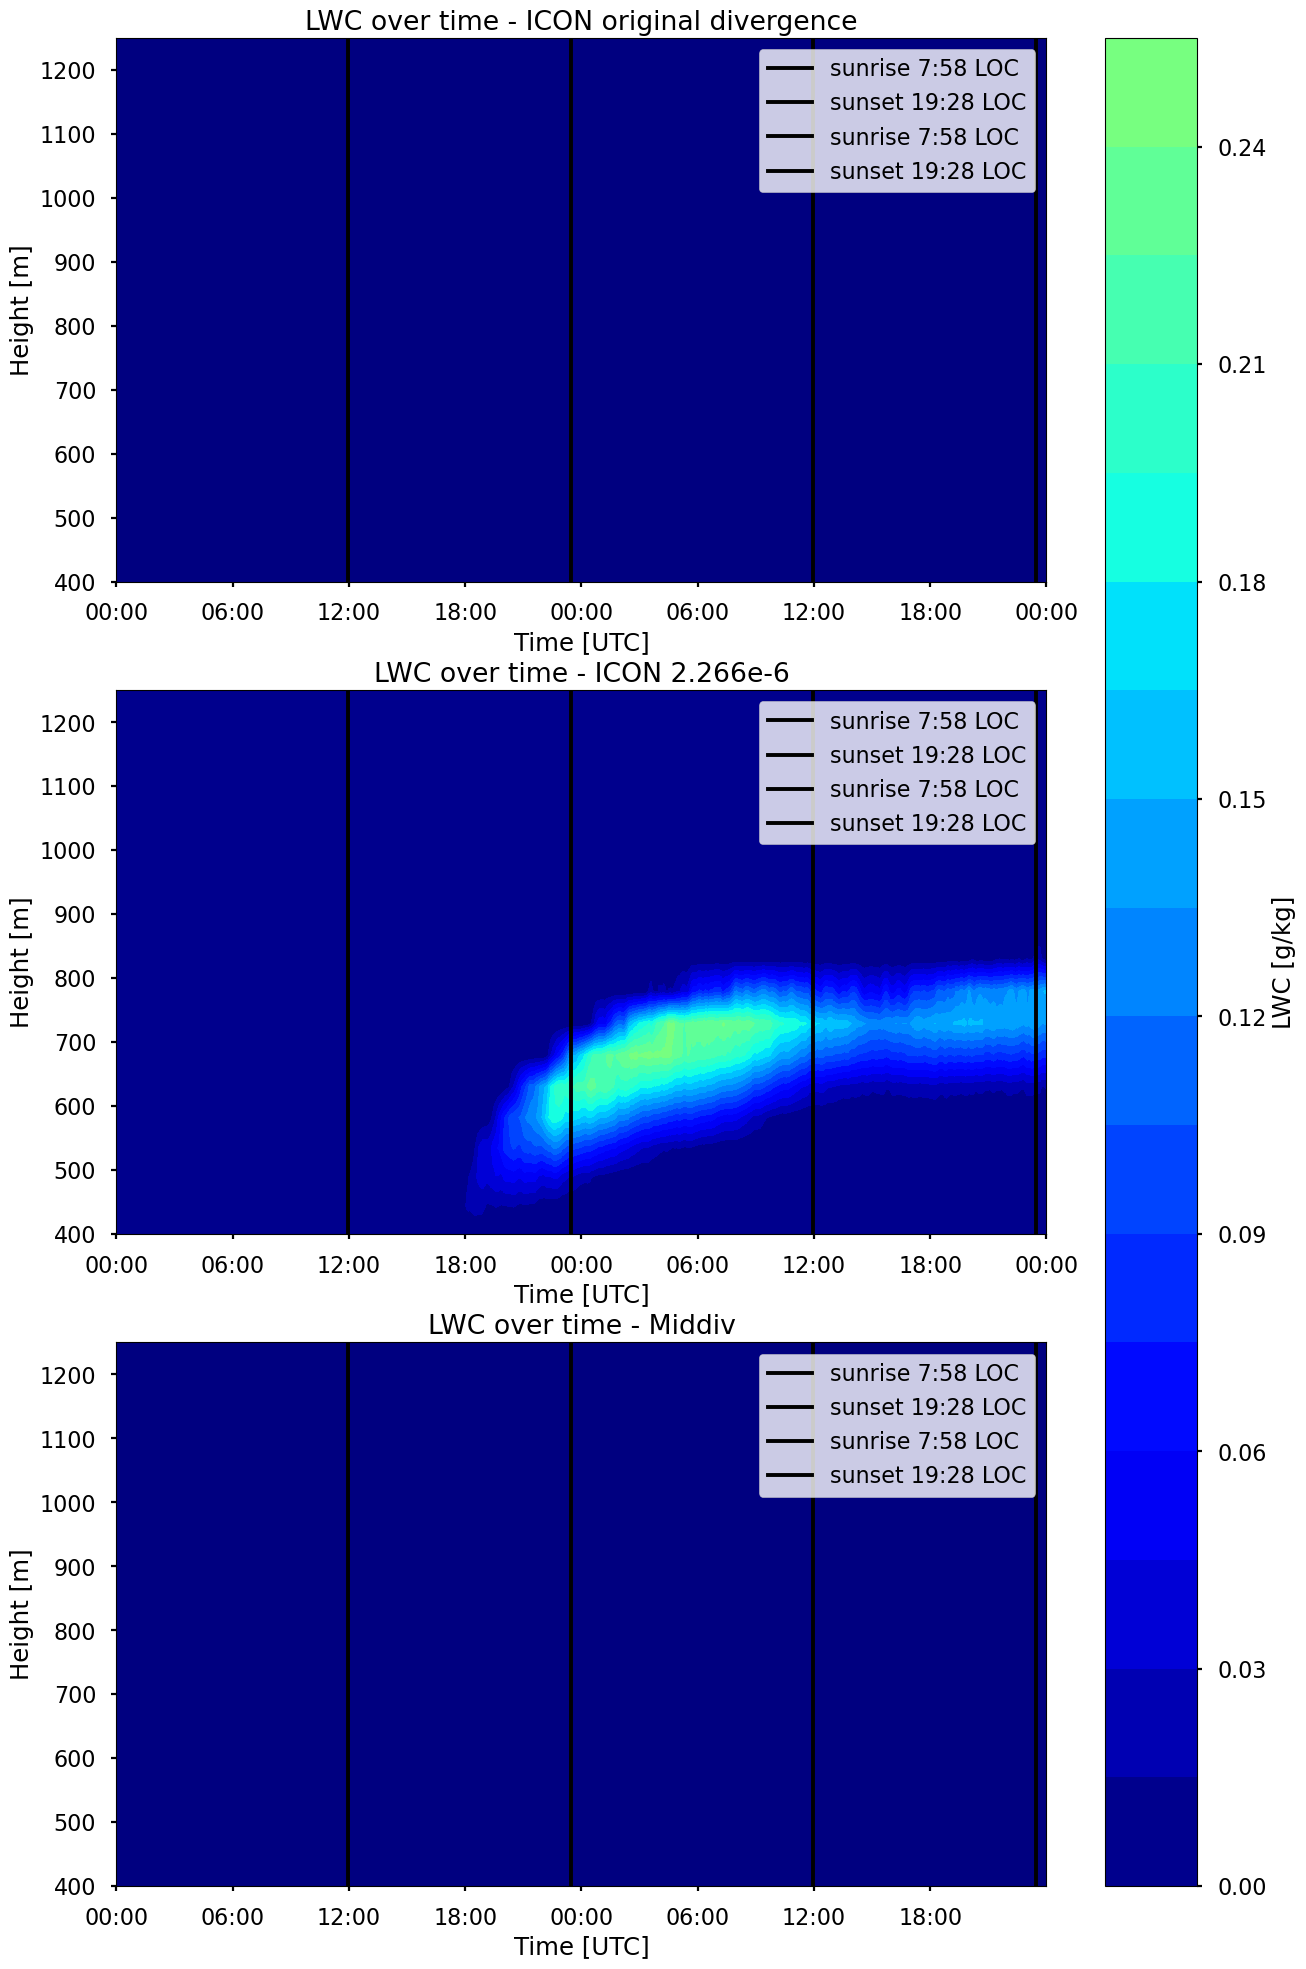

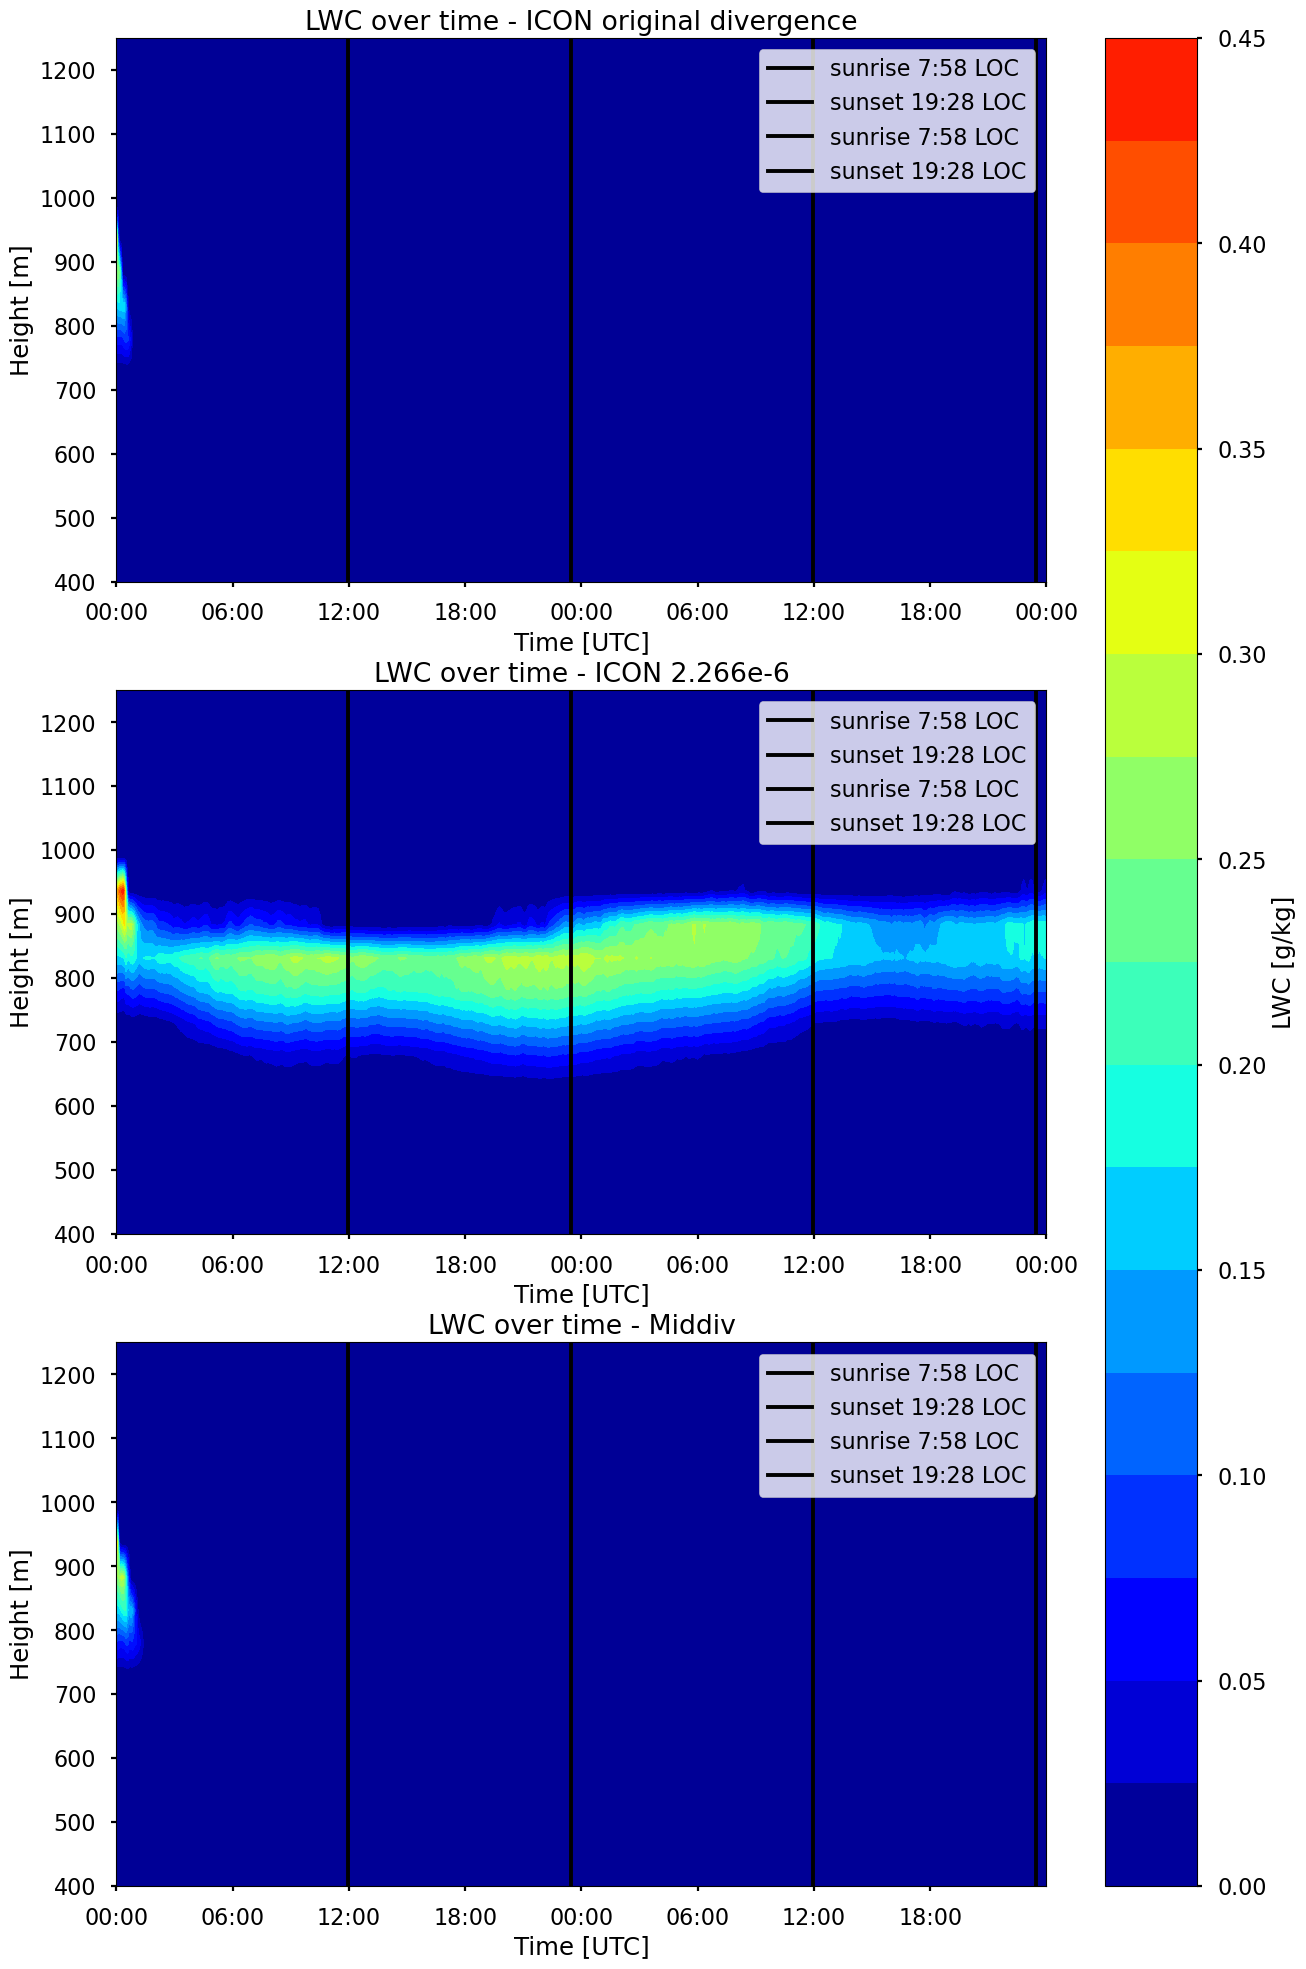

In [2]:


#############################

def plot_lwc_over_time(ax, ps_ds, name):
    # print(ucla_times)
    c = ax.contourf(ps_ds["time"].values, ps_ds["zt"], ps_ds["l"].T, levels=20, cmap="jet", vmin=0, vmax=0.5)
    ax.set_ylim(400, 1250)
    ax.set_ylabel("Height [m]")
    ax.set_title("LWC over time - " + name)
    ax.xaxis.set_major_formatter(myFmt)
    ax.axvline(np.datetime64("2000-01-01T11:58:00"), color="black",label="sunrise 7:58 LOC")
    ax.axvline(np.datetime64("2000-01-01T23:28:00"), color="black",label="sunset 19:28 LOC")
    ax.axvline(np.datetime64("2000-01-02T11:58:00"), color="black",label="sunrise 7:58 LOC")
    ax.axvline(np.datetime64("2000-01-02T23:28:00"), color="black",label="sunset 19:28 LOC")
    ax.legend()
    return c

#############################

# 1. Figure: unsharp ICON divergence
fig1, axes1 = plt.subplots(3, 1, figsize=(15, 24))

plot_lwc_over_time(axes1[0], ds_ICON_unsharp_orig_div_ps, "ICON original divergence")
c1 = plot_lwc_over_time(axes1[1], ds_ICON_unsharp_ps, "ICON 2.266e-6")
plot_lwc_over_time(axes1[2], ds_ICON_unsharp_middiv_ps, "Middiv")
fig1.colorbar(c1, ax=axes1[:], label="LWC [g/kg]")
plt.xticks(np.arange(np.datetime64("2000-01-01T00:00:00") , np.datetime64("2000-01-03T00:00:00"),21600),\
              ["00:00", "06:00", "12:00", "18:00", "00:00", "06:00", "12:00", "18:00"])

for ax in axes1:
    ax.set_xlabel("Time [UTC]")

#plt.tight_layout()
plt.savefig(outputdir + "MultiPanel_LWC_ICON_divergence_origtime.png")
plt.show()

#############################

# 1. Figure: sharp ICON divergence
fig1, axes1 = plt.subplots(3, 1, figsize=(15, 24))

plot_lwc_over_time(axes1[0], ds_ICON_sharp_orig_div_ps, "ICON original divergence")
c1 = plot_lwc_over_time(axes1[1], ds_ICON_sharp_ps, "ICON 2.266e-6")
plot_lwc_over_time(axes1[2], ds_ICON_sharp_middiv_ps, "Middiv")
fig1.colorbar(c1, ax=axes1[:], label="LWC [g/kg]")
plt.xticks(np.arange(np.datetime64("2000-01-01T00:00:00") , np.datetime64("2000-01-03T00:00:00"),21600),\
              ["00:00", "06:00", "12:00", "18:00", "00:00", "06:00", "12:00", "18:00"])

for ax in axes1:
    ax.set_xlabel("Time [UTC]")

#plt.tight_layout()
plt.savefig(outputdir + "MultiPanel_LWC_ICON_divergence_origtime.png")
plt.show()

#############################

In [3]:
# Werte abgebrochene Läufe aus, um zu verstehen, woran es vielleicht lag:
'''
path = "/home/qwertz/UCLA/uclales/Runs/"

ABLmi_ps = xr.open_dataset(path+"22_ABLmi_dz10m/rf01.ps.nc")
FTmi_ps = xr.open_dataset(path+"22_FTmi_dz10m/rf01.ps.nc")
FTpl_ps = xr.open_dataset(path+"22_FTpl_dz10m/rf01.ps.nc")
CCNmi_ps = xr.open_dataset(path+"22_CCNmi_dz10m/rf01.ps.nc")

##################################################################

def plot_lwc_over_time(ax, ps_ds, name):
    # print(ucla_times)
    c = ax.contourf(ps_ds["time"].values, ps_ds["zt"], ps_ds["l"].T, levels=20, cmap="jet") #, vmin=0, vmax=0.5)
    ax.set_ylim(400, 1250)
    ax.set_ylabel("Height [m]")
    ax.set_title("LWC over time - " + name)
    ax.xaxis.set_major_formatter(myFmt)
    ax.axvline(np.datetime64("2000-01-01T11:58:00"), color="black",label="sunrise 7:58 LOC")
    ax.axvline(np.datetime64("2000-01-01T23:28:00"), color="black",label="sunset 19:28 LOC")
    ax.axvline(np.datetime64("2000-01-02T11:58:00"), color="black",label="sunrise 7:58 LOC")
    ax.axvline(np.datetime64("2000-01-02T23:28:00"), color="black",label="sunset 19:28 LOC")

    ax.set_xlim(np.datetime64("2000-01-01T00:00:00"), np.datetime64("2000-01-01T03:00:00"))
    
    ax.legend()
    return c

#############################

# 1. Figure: unsharp ICON divergence
fig1, axes1 = plt.subplots(4, 1, figsize=(15, 24))

plot_lwc_over_time(axes1[0], ABLmi_ps, "ABL-")
c1 = plot_lwc_over_time(axes1[1], FTmi_ps, "FT-")
plot_lwc_over_time(axes1[2], FTpl_ps, "FT+")
plot_lwc_over_time(axes1[3], CCNmi_ps, "CCN-")
fig1.colorbar(c1, ax=axes1[:], label="LWC [g/kg]")
# plt.xticks(np.arange(np.datetime64("2000-01-01T00:00:00") , np.datetime64("2000-01-03T00:00:00"),21600),\
#              ["00:00", "06:00", "12:00", "18:00", "00:00", "06:00", "12:00", "18:00"])

for ax in axes1:
    ax.set_xlabel("Time [UTC]")

# plt.tight_layout()
# plt.savefig(outputdir + "Multipanel_failed_runs.png")
plt.show()

#############################
'''

'\npath = "/home/qwertz/UCLA/uclales/Runs/"\n\nABLmi_ps = xr.open_dataset(path+"22_ABLmi_dz10m/rf01.ps.nc")\nFTmi_ps = xr.open_dataset(path+"22_FTmi_dz10m/rf01.ps.nc")\nFTpl_ps = xr.open_dataset(path+"22_FTpl_dz10m/rf01.ps.nc")\nCCNmi_ps = xr.open_dataset(path+"22_CCNmi_dz10m/rf01.ps.nc")\n\n##################################################################\n\ndef plot_lwc_over_time(ax, ps_ds, name):\n    # print(ucla_times)\n    c = ax.contourf(ps_ds["time"].values, ps_ds["zt"], ps_ds["l"].T, levels=20, cmap="jet") #, vmin=0, vmax=0.5)\n    ax.set_ylim(400, 1250)\n    ax.set_ylabel("Height [m]")\n    ax.set_title("LWC over time - " + name)\n    ax.xaxis.set_major_formatter(myFmt)\n    ax.axvline(np.datetime64("2000-01-01T11:58:00"), color="black",label="sunrise 7:58 LOC")\n    ax.axvline(np.datetime64("2000-01-01T23:28:00"), color="black",label="sunset 19:28 LOC")\n    ax.axvline(np.datetime64("2000-01-02T11:58:00"), color="black",label="sunrise 7:58 LOC")\n    ax.axvline(np.datetime6

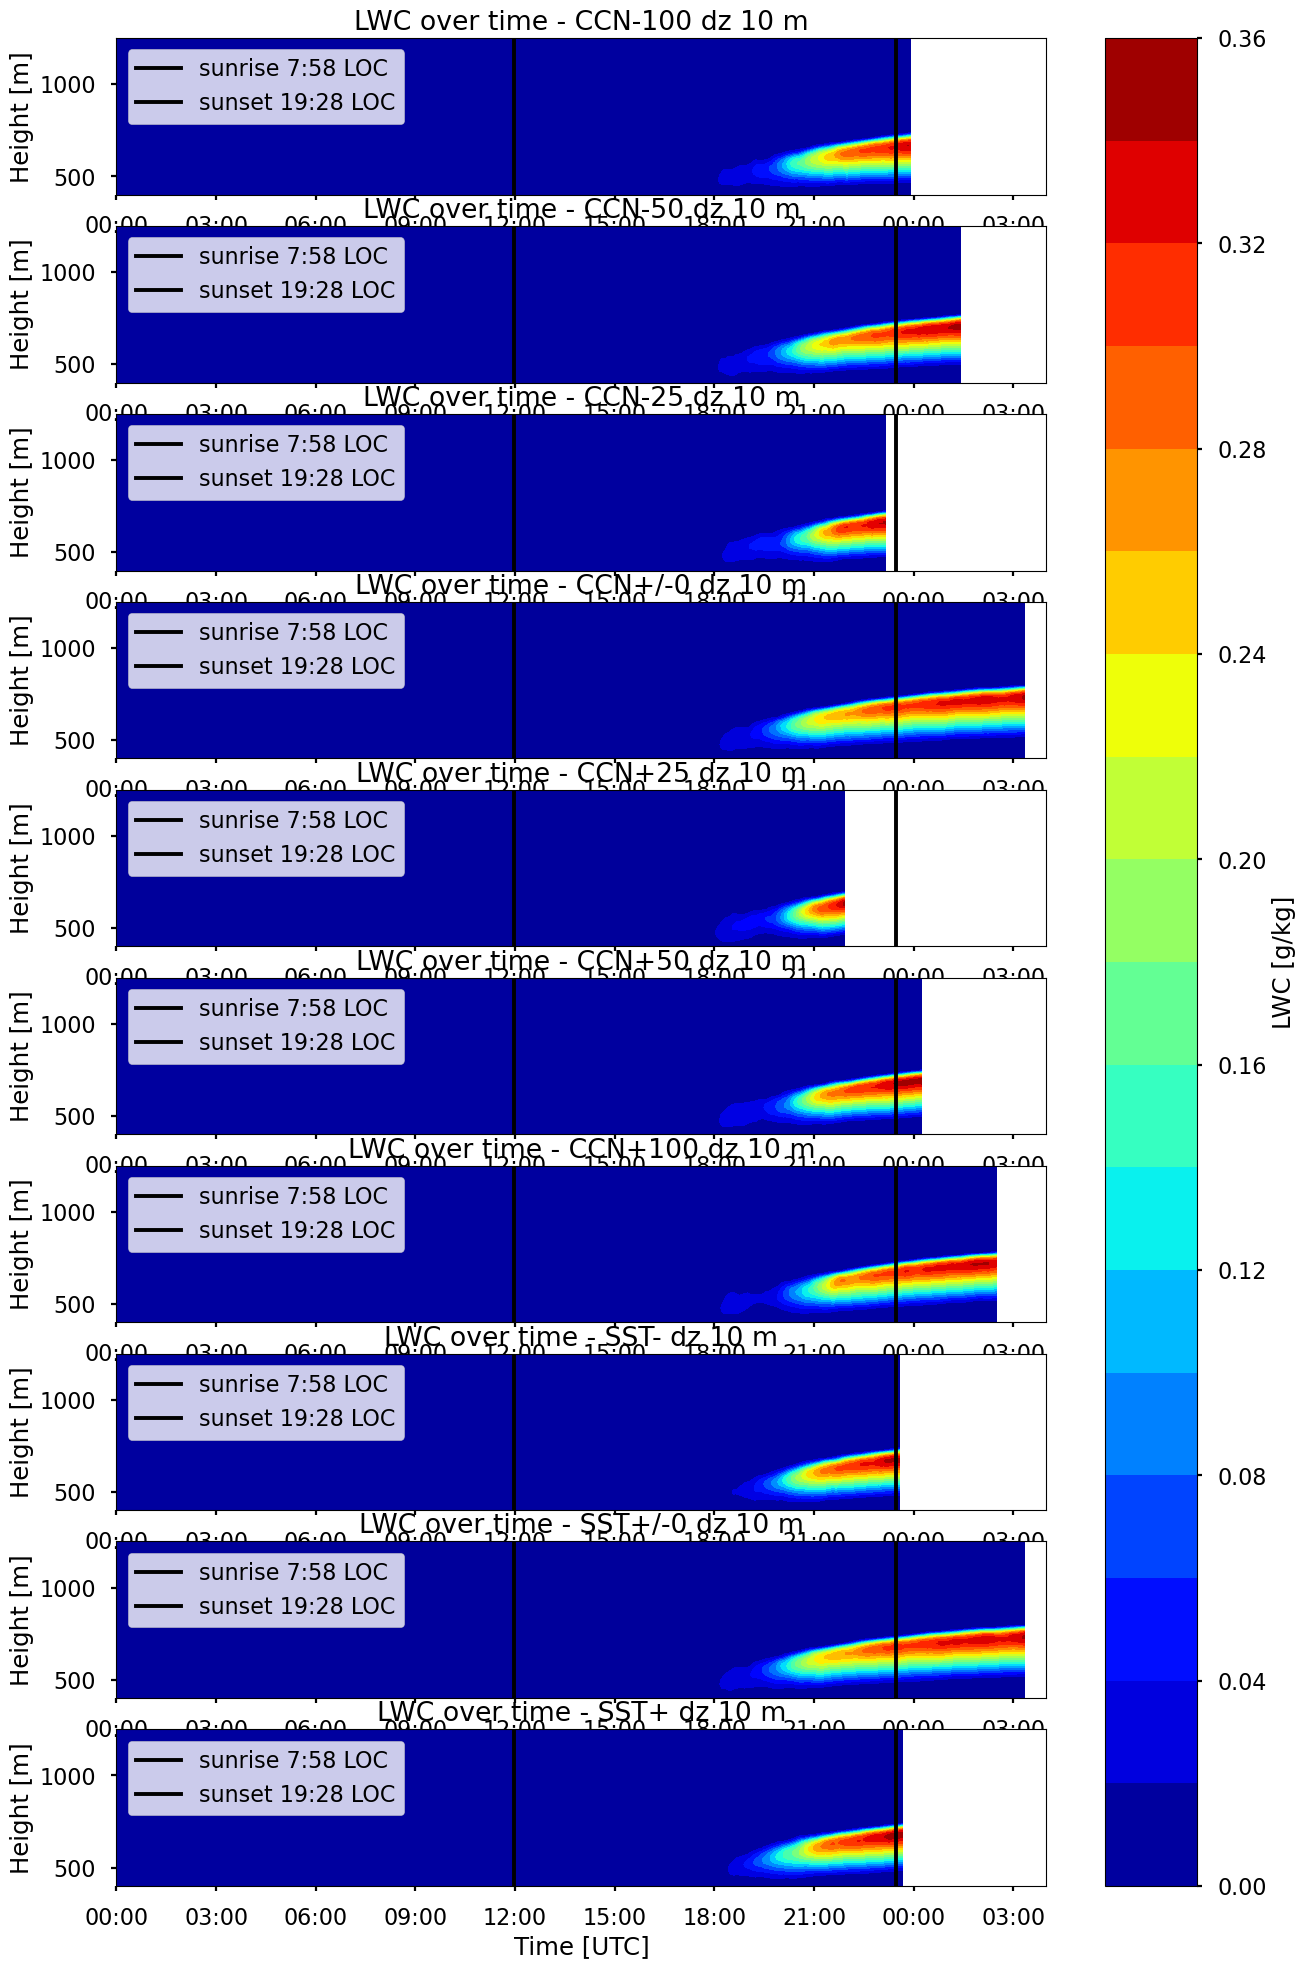

In [4]:
# Plots aller übrigen Simulationen mit dz 10m; 1 Tag:

path = "/home/qwertz/UCLA/uclales/Runs/"

CCNmi10_ps = xr.open_dataset(path+"22_CCNmi_dz10m/rf01.ps.nc") # 86380
CCNpl10_ps = xr.open_dataset(path+"22_CCNpl_dz10m/rf01.ps.nc") # 95000
CCNmi25_10_ps = xr.open_dataset(path+"22_CCNmi25_dz10m/rf01.ps.nc") # 83588 
CCNmi50_10_ps = xr.open_dataset(path+"22_CCNmi50_dz10m/rf01.ps.nc") # 91609
CCNpl25_10_ps = xr.open_dataset(path+"22_CCNpl25_dz10m/rf01.ps.nc") # 78912
CCNpl50_10_ps = xr.open_dataset(path+"22_CCNpl50_dz10m/rf01.ps.nc") # 87453
CCN0_10_ps = xr.open_dataset(path+"22_dz10m_sharp/rf01.ps.nc") # 98497

SSTmi10_ps = xr.open_dataset(path+"22_SSTmi_dz10m/rf01.ps.nc") # 85139
SSTpl10_ps = xr.open_dataset(path+"22_SSTpl_dz10m/rf01.ps.nc") # 85261


ds_dict = {"CCN-100 dz 10 m": CCNmi10_ps, "CCN-50 dz 10 m":CCNmi50_10_ps, "CCN-25 dz 10 m":CCNmi25_10_ps,\
           "CCN+/-0 dz 10 m": CCN0_10_ps,"CCN+25 dz 10 m":CCNpl25_10_ps,\
            "CCN+50 dz 10 m":CCNpl50_10_ps, "CCN+100 dz 10 m": CCNpl10_ps,\
           "SST- dz 10 m": SSTmi10_ps,"SST+/-0 dz 10 m": CCN0_10_ps, "SST+ dz 10 m": SSTpl10_ps}

##################################################################

def plot_lwc_over_time(ax, ps_ds, name):
    # print(ucla_times)
    c = ax.contourf(ps_ds["time"].values, ps_ds["zt"], ps_ds["l"].T, levels=20, cmap="jet") #, vmin=0, vmax=0.5)
    ax.set_ylim(400, 1250)
    ax.set_ylabel("Height [m]")
    ax.set_title("LWC over time - " + name)
    ax.xaxis.set_major_formatter(myFmt)
    ax.axvline(np.datetime64("2000-01-01T11:58:00"), color="black",label="sunrise 7:58 LOC")
    ax.axvline(np.datetime64("2000-01-01T23:28:00"), color="black",label="sunset 19:28 LOC")
    # ax.axvline(np.datetime64("2000-01-02T11:58:00"), color="black",label="sunrise 7:58 LOC")
    # ax.axvline(np.datetime64("2000-01-02T23:28:00"), color="black",label="sunset 19:28 LOC")

    ax.set_xlim(np.datetime64("2000-01-01T00:00:00"), np.datetime64("2000-01-02T04:00:00"))
    
    ax.legend()
    return c

#############################

# 1. Figure: unsharp ICON divergence
fig1, axes1 = plt.subplots(len(ds_dict), 1, figsize=(15, 24))

for i, (key, value) in enumerate(ds_dict.items()):
    if i==0:
        c1 = plot_lwc_over_time(axes1[i], value, key)
    else:
        plot_lwc_over_time(axes1[i], value, key)

#############################
# plot_lwc_over_time(axes1[0], ABLmi_ps, "ABL-")
# c1 = plot_lwc_over_time(axes1[1], FTmi_ps, "FT-")
# plot_lwc_over_time(axes1[2], FTpl_ps, "FT+")
# plot_lwc_over_time(axes1[3], CCNmi_ps, "CCN-")
##########################
  
fig1.colorbar(c1, ax=axes1[:], label="LWC [g/kg]")
# plt.xticks(np.arange(np.datetime64("2000-01-01T00:00:00") , np.datetime64("2000-01-03T00:00:00"),21600),\
#              ["00:00", "06:00", "12:00", "18:00", "00:00", "06:00", "12:00", "18:00"])

for ax in axes1:
    ax.set_xlabel("Time [UTC]")

# plt.tight_layout()
# plt.savefig(outputdir + "Multipanel_failed_runs.png")
plt.show()

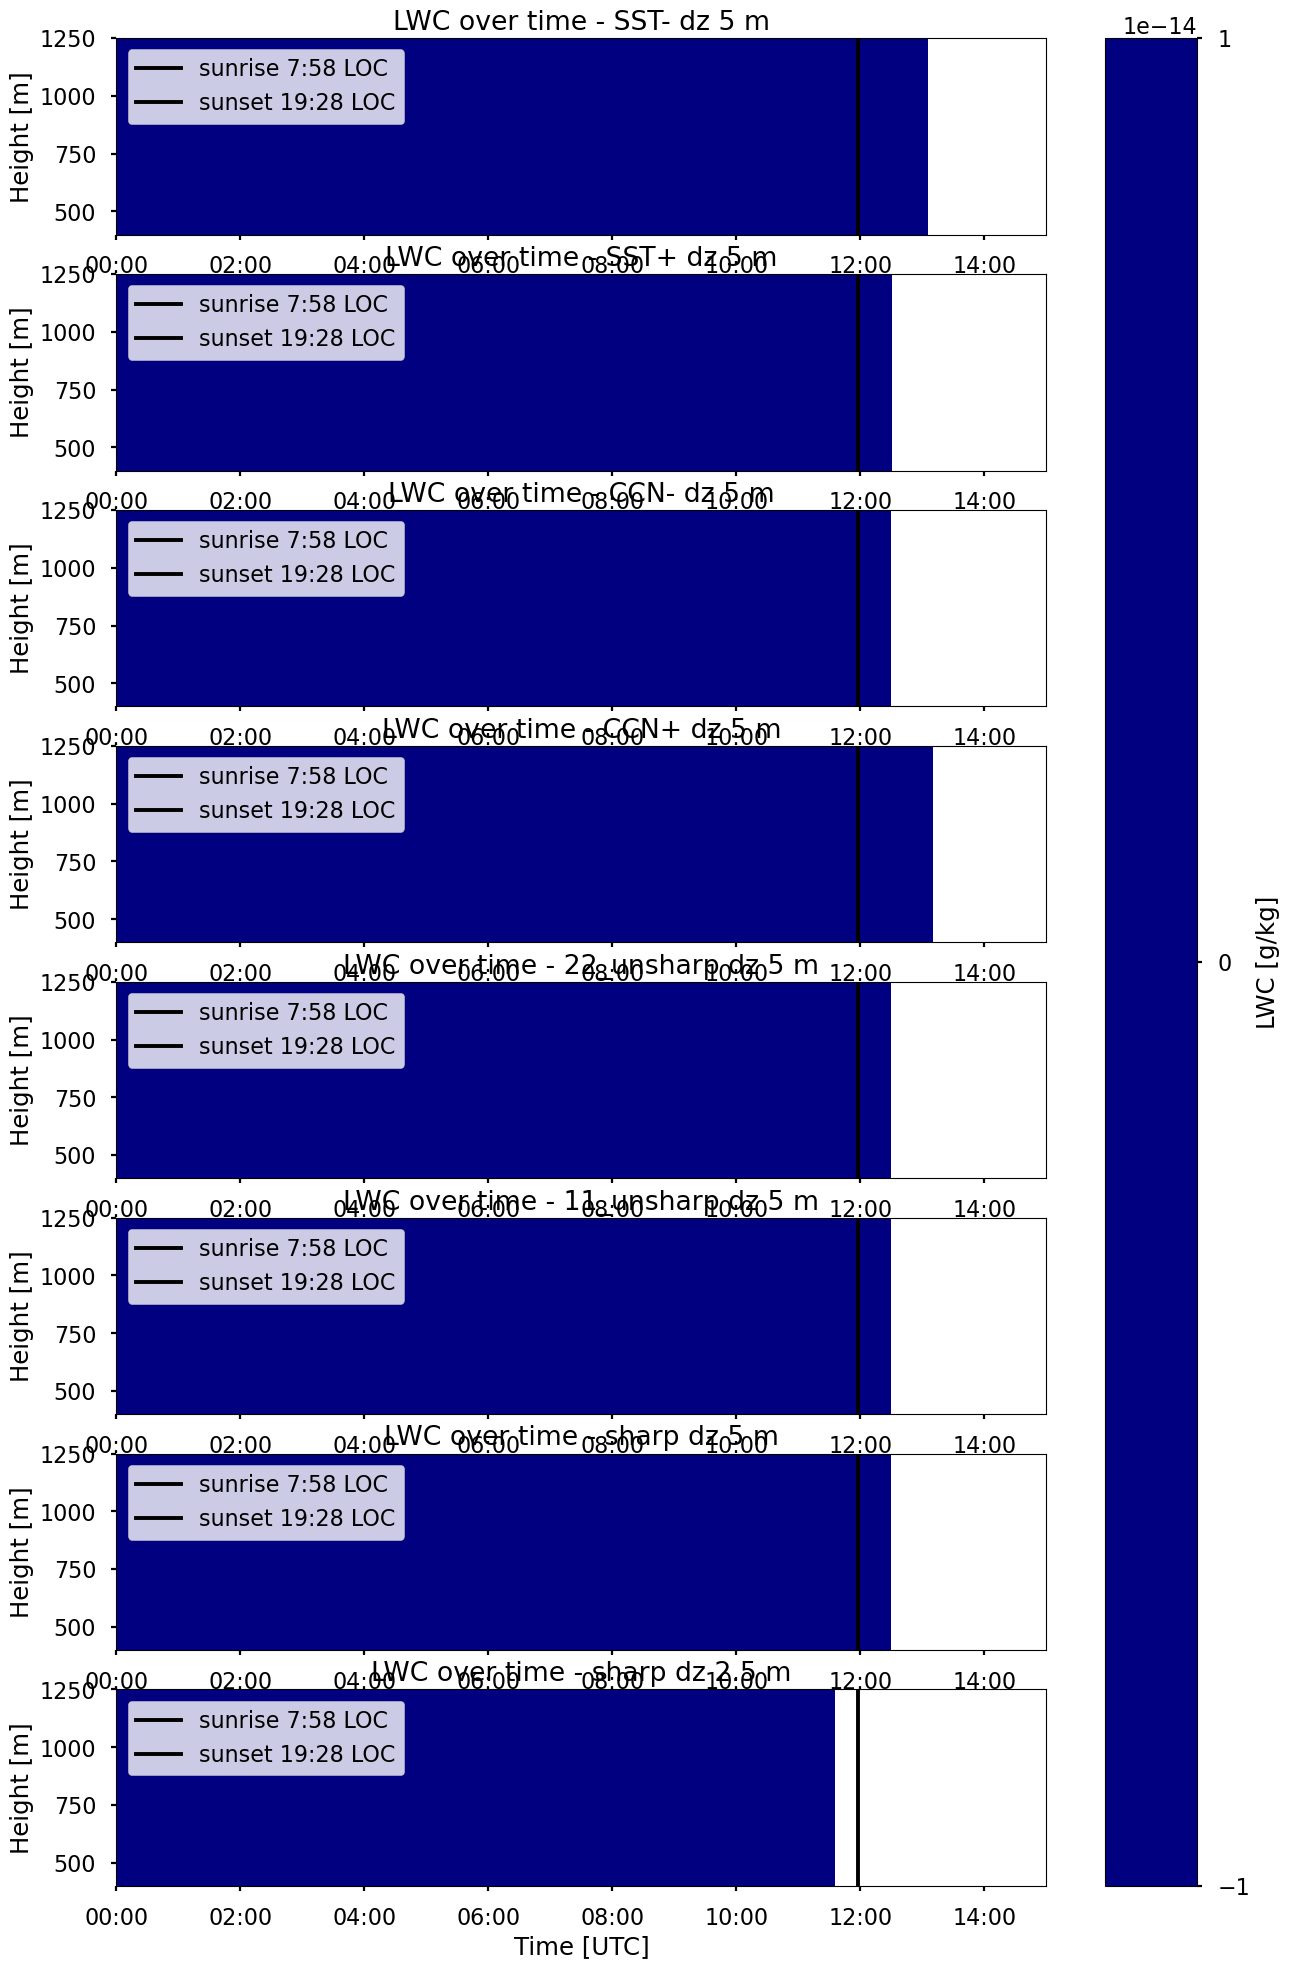

In [5]:
# Plots aller übrigen Simulationen mit dz 5m - halber Tag:

path = "/home/qwertz/UCLA/uclales/Runs/"

SSTmi_5_ps = xr.open_dataset(path+"11_SSTmi_zgrid5_sharpHIGH/rf01.ps.nc") #  47320.00 
SSTpl_5_ps = xr.open_dataset(path+"11_SSTpl_zgrid5_sharp3HIGH/rf01.ps.nc") #  44999 
CCNmi_5_ps = xr.open_dataset(path+"11_CCNmi_zgrid5_sharpHIGH/rf01.ps.nc") #  45175
CCNpl_5_ps = xr.open_dataset(path+"11_CCNpl_zgrid5_sharpHIGH/rf01.ps.nc") #  45175
dz5_unsharp_ps = xr.open_dataset(path+"22_zgrid5_unsharp/rf01.ps.nc") #  45233.0
dz5_unsharp11_ps = xr.open_dataset(path+"11_zgrid5_unsharpenedHIGH/rf01.ps.nc") #  42236.05 
dz5_sharp_ps = xr.open_dataset(path+"11_zgrid5_sharpHIGH/rf01.ps.nc") #  45233. 
dz2dot5_sharp_ps = xr.open_dataset(path+"11_zgrid2dot5_sharpHIGH/rf01.ps.nc") #  41669.
dz2dot5_unsharp_ps = xr.open_dataset(path+"11_zgrid2dot5_unsharpenedHIGH/rf01.ps.nc") #  42236

ds_dict = {"SST- dz 5 m": SSTmi_5_ps, "SST+ dz 5 m": SSTpl_5_ps, "CCN- dz 5 m":CCNmi_5_ps, "CCN+ dz 5 m":CCNpl_5_ps,\
          "22_unsharp dz 5 m":  dz5_unsharp_ps, "11_unsharp dz 5 m":  dz5_unsharp11_ps, "sharp dz 5 m":  dz5_sharp_ps,\
          "sharp dz 2.5 m":  dz2dot5_sharp_ps}

##################################################################

def plot_lwc_over_time(ax, ps_ds, name):
    # print(ucla_times)
    c = ax.contourf(ps_ds["time"].values, ps_ds["zt"], ps_ds["l"].T, levels=20, cmap="jet", vmin=0, vmax=0.005)
    ax.set_ylim(400, 1250)
    ax.set_ylabel("Height [m]")
    ax.set_title("LWC over time - " + name)
    ax.xaxis.set_major_formatter(myFmt)
    ax.axvline(np.datetime64("2000-01-01T11:58:00"), color="black",label="sunrise 7:58 LOC")
    ax.axvline(np.datetime64("2000-01-01T23:28:00"), color="black",label="sunset 19:28 LOC")
    # ax.axvline(np.datetime64("2000-01-02T11:58:00"), color="black",label="sunrise 7:58 LOC")
    # ax.axvline(np.datetime64("2000-01-02T23:28:00"), color="black",label="sunset 19:28 LOC")

    ax.set_xlim(np.datetime64("2000-01-01T00:00:00"), np.datetime64("2000-01-01T15:00:00"))
    
    ax.legend()
    return c

#############################

# 1. Figure: unsharp ICON divergence
fig1, axes1 = plt.subplots(len(ds_dict), 1, figsize=(15, 24))

for i, (key, value) in enumerate(ds_dict.items()):
    if i==0:
        c1 = plot_lwc_over_time(axes1[i], value, key)
    else:
        plot_lwc_over_time(axes1[i], value, key)

  
fig1.colorbar(c1, ax=axes1[:], label="LWC [g/kg]")
# plt.xticks(np.arange(np.datetime64("2000-01-01T00:00:00") , np.datetime64("2000-01-03T00:00:00"),21600),\
#              ["00:00", "06:00", "12:00", "18:00", "00:00", "06:00", "12:00", "18:00"])

for ax in axes1:
    ax.set_xlabel("Time [UTC]")

# plt.tight_layout()
# plt.savefig(outputdir + "Multipanel_failed_runs.png")
plt.show()

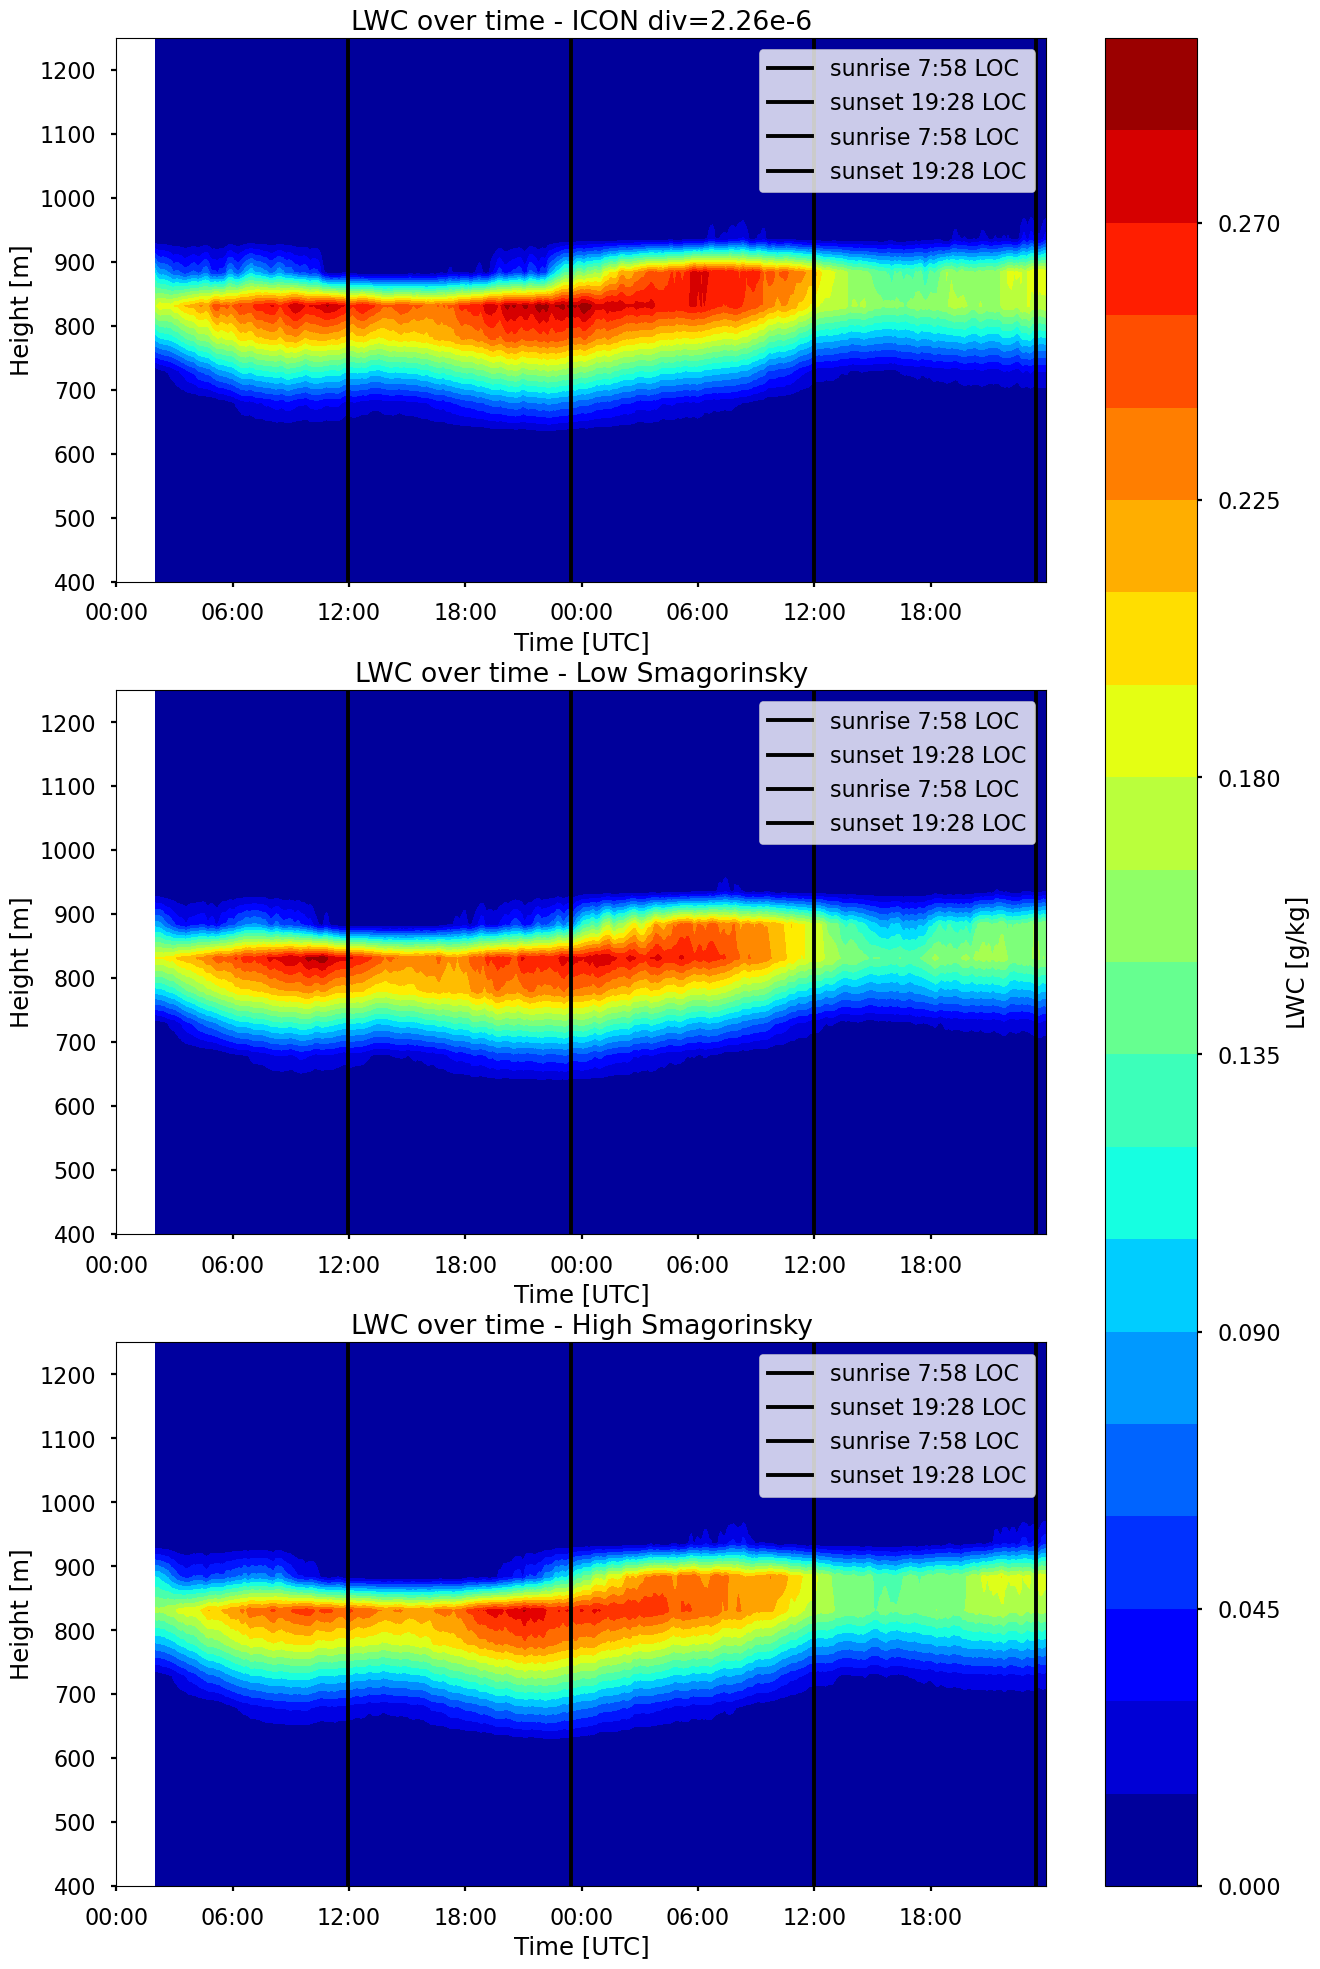

In [6]:
# Plot data of Smagorinsky against ICON for 2 days:


path = "/home/qwertz/UCLA/uclales/Runs/"

ICON_sharp_ps = xr.open_dataset(path+"11_Mimic_ICON_sharp/rf01.ps.nc").sel(time=slice("2000-01-01T02:00:00.000000000", "2000-01-03T00:00:00.000000000")) # 151198
low_smag_ps = xr.open_dataset(path+"22_LowSMAG_ICON/rf01.ps.nc").sel(time=slice("2000-01-01T02:00:00.000000000", "2000-01-03T00:00:00.000000000"))
high_smag_ps = xr.open_dataset(path+"22_HighSMAG_ICON/rf01.ps.nc").sel(time=slice("2000-01-01T02:00:00.000000000", "2000-01-03T00:00:00.000000000"))

# Plotte
# 11_Mimic_ICON_unsharp_nudge_test: 151198
# "ICON nudge T": ICON_nudgetest_ps,
# ICON run mit sharp und div=2.26
# Beide Smagorinsky Läufe...

ds_dict = { "ICON div=2.26e-6": ICON_sharp_ps,\
          "Low Smagorinsky": low_smag_ps, "High Smagorinsky": high_smag_ps}

##################################################################

def plot_lwc_over_time(ax, ps_ds, name):
    # print(ucla_times)
    c = ax.contourf(ps_ds["time"].values, ps_ds["zt"], ps_ds["l"].T, levels=20, cmap="jet")#, vmin=0, vmax=0.005)
    ax.set_ylim(400, 1250)
    ax.set_ylabel("Height [m]")
    ax.set_title("LWC over time - " + name)
    ax.xaxis.set_major_formatter(myFmt)
    ax.axvline(np.datetime64("2000-01-01T11:58:00"), color="black",label="sunrise 7:58 LOC")
    ax.axvline(np.datetime64("2000-01-01T23:28:00"), color="black",label="sunset 19:28 LOC")
    ax.axvline(np.datetime64("2000-01-02T11:58:00"), color="black",label="sunrise 7:58 LOC")
    ax.axvline(np.datetime64("2000-01-02T23:28:00"), color="black",label="sunset 19:28 LOC")

    ax.set_xlim(np.datetime64("2000-01-01T00:00:00"), np.datetime64("2000-01-02T23:59:00"))
    
    ax.legend()
    return c

#############################

# 1. Figure: unsharp ICON divergence
fig1, axes1 = plt.subplots(len(ds_dict), 1, figsize=(15, 24))

for i, (key, value) in enumerate(ds_dict.items()):
    if i==0:
        c1 = plot_lwc_over_time(axes1[i], value, key)
    else:
        plot_lwc_over_time(axes1[i], value, key)
  
fig1.colorbar(c1, ax=axes1[:], label="LWC [g/kg]")
# plt.xticks(np.arange(np.datetime64("2000-01-01T00:00:00") , np.datetime64("2000-01-03T00:00:00"),21600),\
#              ["00:00", "06:00", "12:00", "18:00", "00:00", "06:00", "12:00", "18:00"])

for ax in axes1:
    ax.set_xlabel("Time [UTC]")

# plt.tight_layout()
plt.savefig(outputdir + "Multipanel_LWC_smagorinsky.png")
plt.show()

###################################
# Bearbeite Titel so, dass sie aussagekräftiger sind...
# 



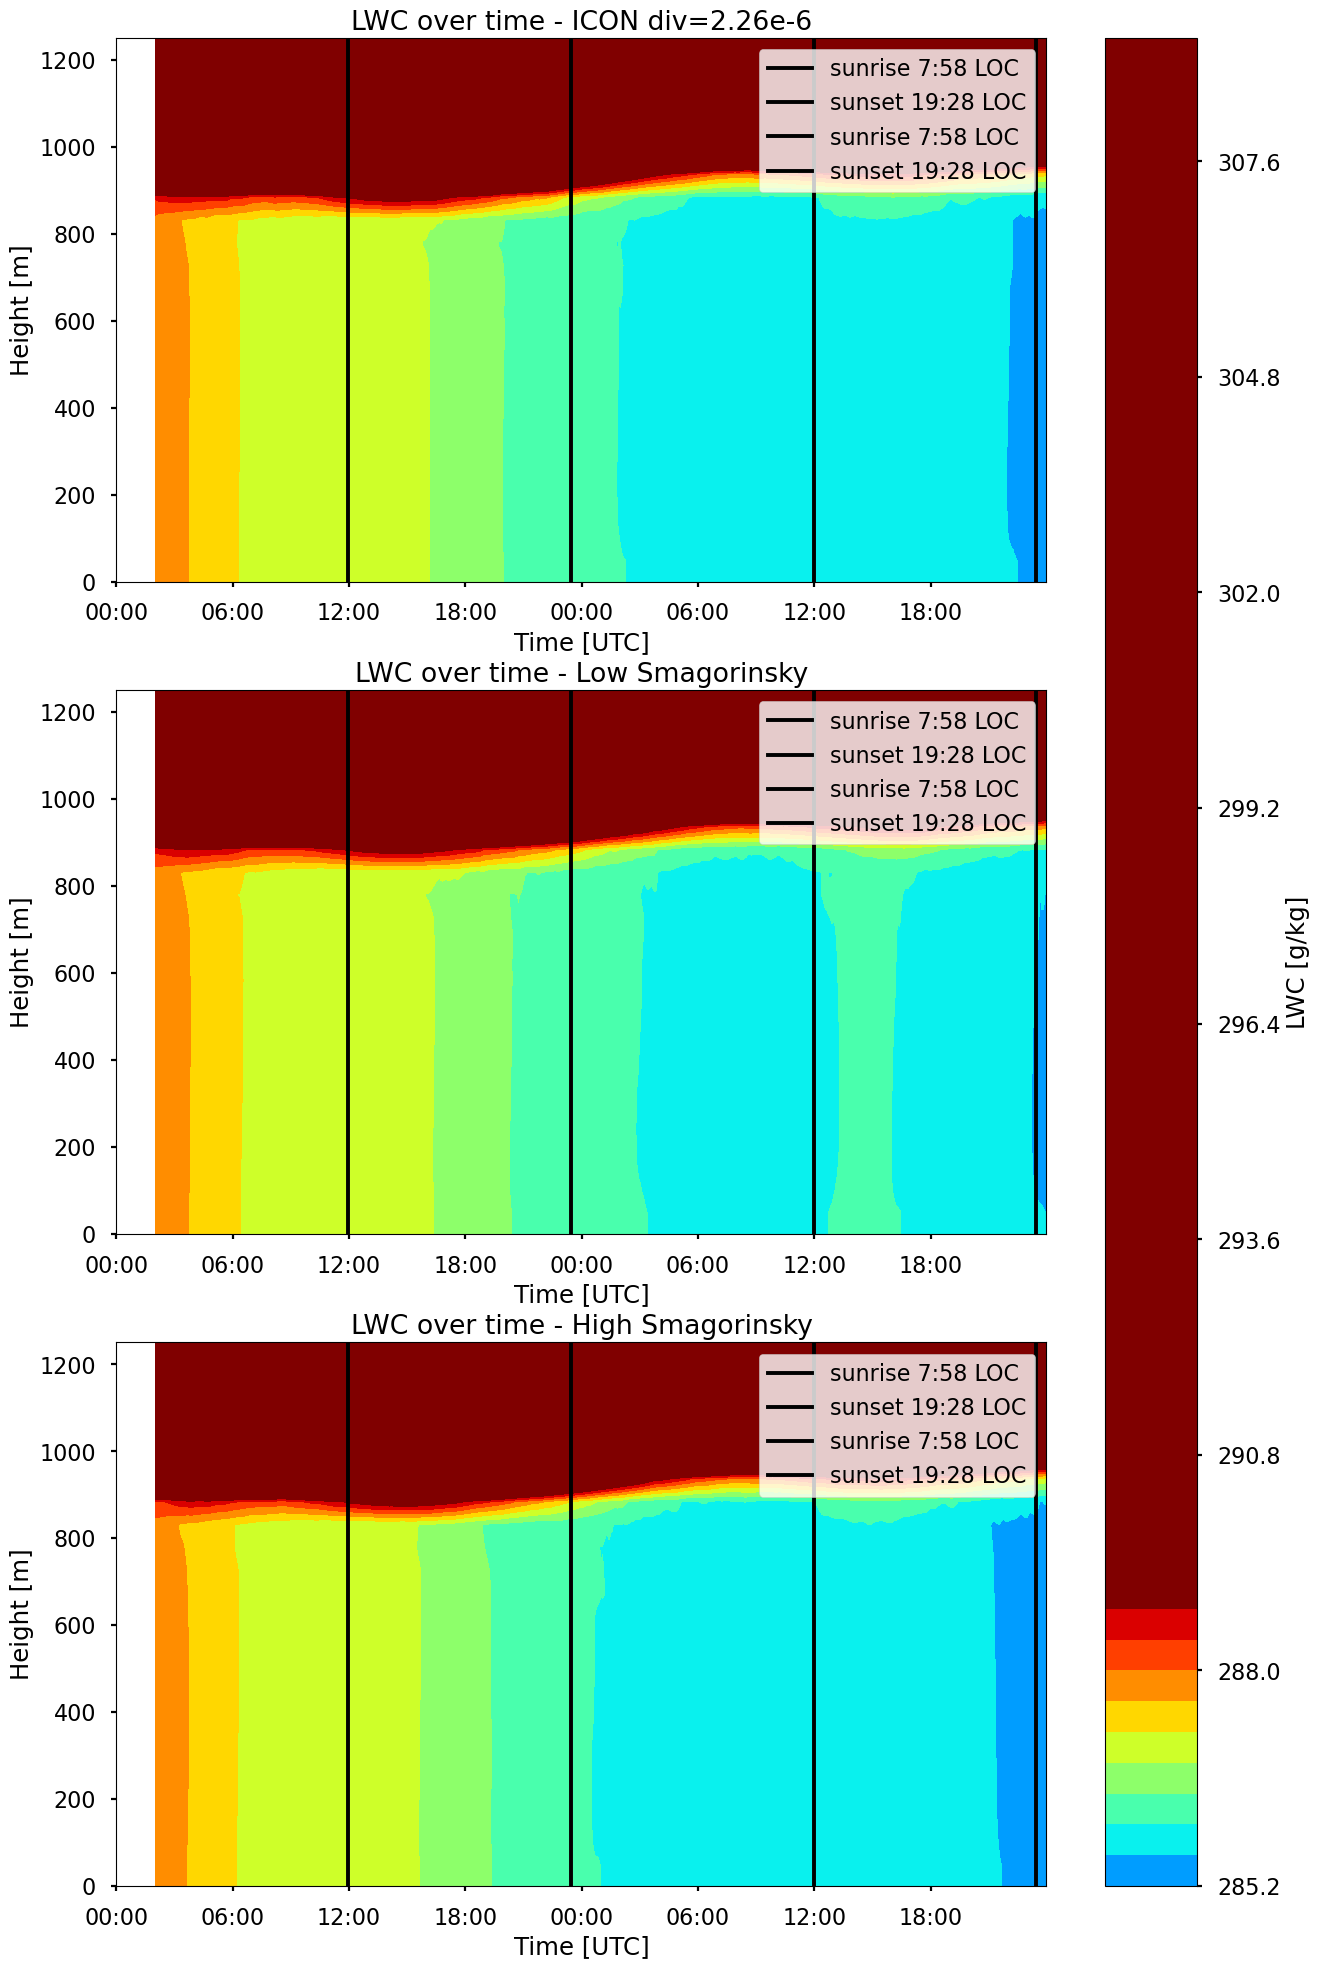

In [7]:
# Plot data of Smagorinsky Theta


path = "/home/qwertz/UCLA/uclales/Runs/"

ICON_sharp_ps = xr.open_dataset(path+"11_Mimic_ICON_sharp/rf01.ps.nc").sel(time=slice("2000-01-01T02:00:00.000000000", "2000-01-03T00:00:00.000000000")) # 151198
low_smag_ps = xr.open_dataset(path+"22_LowSMAG_ICON/rf01.ps.nc").sel(time=slice("2000-01-01T02:00:00.000000000", "2000-01-03T00:00:00.000000000"))
high_smag_ps = xr.open_dataset(path+"22_HighSMAG_ICON/rf01.ps.nc").sel(time=slice("2000-01-01T02:00:00.000000000", "2000-01-03T00:00:00.000000000"))

# Plotte
# 11_Mimic_ICON_unsharp_nudge_test: 151198
# "ICON nudge T": ICON_nudgetest_ps,
# ICON run mit sharp und div=2.26
# Beide Smagorinsky Läufe...

ds_dict = { "ICON div=2.26e-6": ICON_sharp_ps,\
          "Low Smagorinsky": low_smag_ps, "High Smagorinsky": high_smag_ps}

##################################################################

def plot_t_over_time(ax, ps_ds, name):
    # print(ucla_times)
    c = ax.contourf(ps_ds["time"].values, ps_ds["zt"], ps_ds["t"].T, cmap="jet",levels=60, vmin=284, vmax=289)
    ax.set_ylim(0, 1250)
    ax.set_ylabel("Height [m]")
    ax.set_title("LWC over time - " + name)
    ax.xaxis.set_major_formatter(myFmt)
    ax.axvline(np.datetime64("2000-01-01T11:58:00"), color="black",label="sunrise 7:58 LOC")
    ax.axvline(np.datetime64("2000-01-01T23:28:00"), color="black",label="sunset 19:28 LOC")
    ax.axvline(np.datetime64("2000-01-02T11:58:00"), color="black",label="sunrise 7:58 LOC")
    ax.axvline(np.datetime64("2000-01-02T23:28:00"), color="black",label="sunset 19:28 LOC")

    ax.set_xlim(np.datetime64("2000-01-01T00:00:00"), np.datetime64("2000-01-02T23:59:00"))
    
    ax.legend()
    return c

#############################

# 1. Figure: unsharp ICON divergence
fig1, axes1 = plt.subplots(len(ds_dict), 1, figsize=(15, 24))

for i, (key, value) in enumerate(ds_dict.items()):
    if i==0:
        c1 = plot_t_over_time(axes1[i], value, key)
    else:
        plot_t_over_time(axes1[i], value, key)
  
fig1.colorbar(c1, ax=axes1[:], label="LWC [g/kg]")
# plt.xticks(np.arange(np.datetime64("2000-01-01T00:00:00") , np.datetime64("2000-01-03T00:00:00"),21600),\
#              ["00:00", "06:00", "12:00", "18:00", "00:00", "06:00", "12:00", "18:00"])

for ax in axes1:
    ax.set_xlabel("Time [UTC]")

# plt.tight_layout()
plt.savefig(outputdir + "Multipanel_LWC_smagorinsky.png")
plt.show()

###################################
# Bearbeite Titel so, dass sie aussagekräftiger sind...
# 



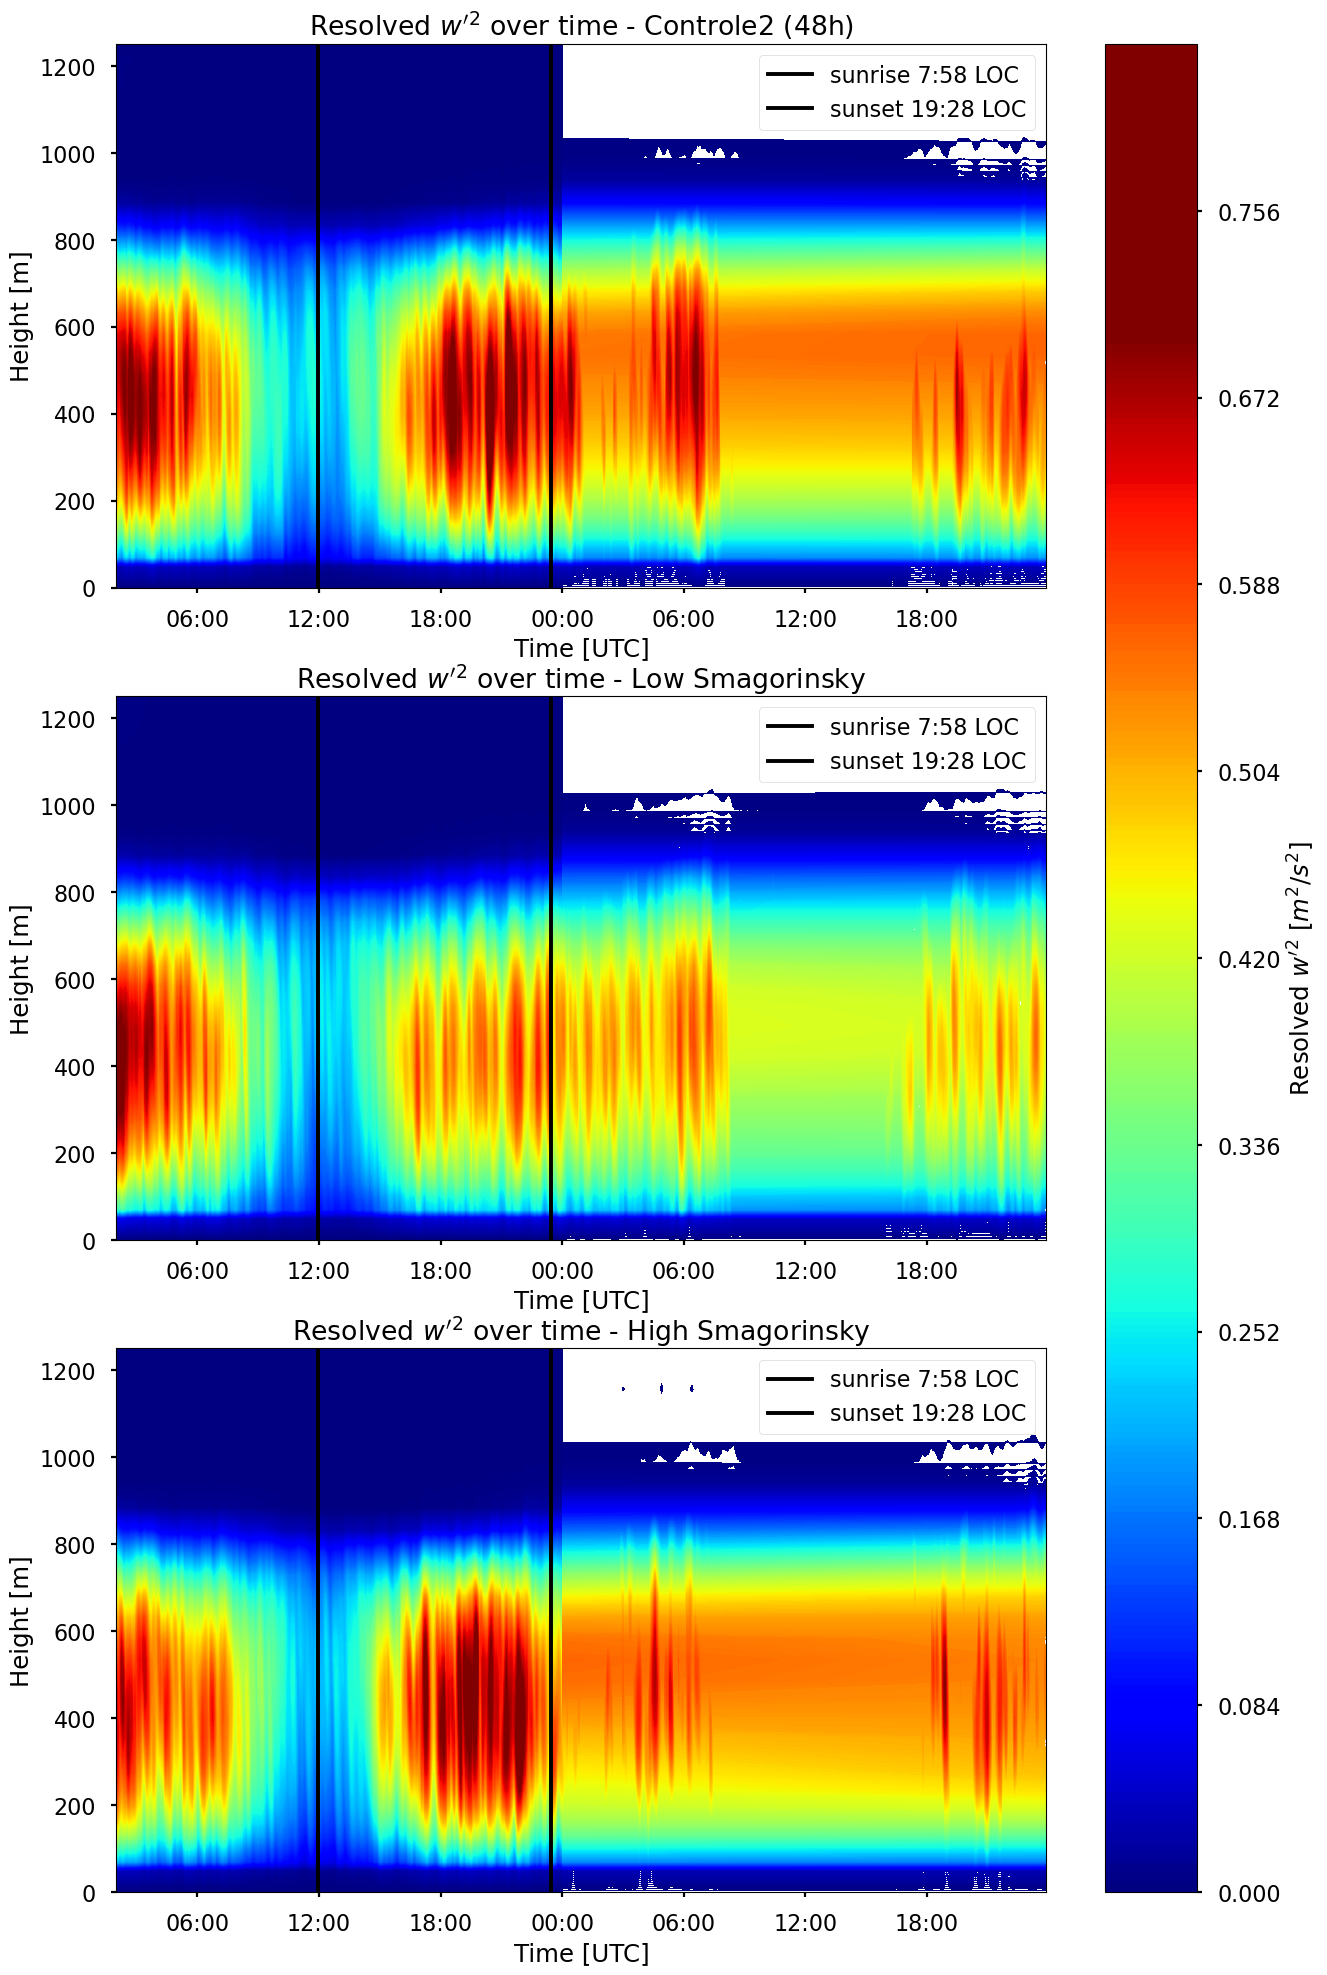

In [8]:
# Calculate w'^2
def calculate_w_squared_resolved(ds):
    return ds['tot_ww'] - ds['sfs_ww']

# Updated plot function for w'^2
def plot_w_squared_over_time(ax, ps_ds, name):
    ucla_times = ucla_time2useful_time(ps_ds["time"].values)
    w_squared_resolved = calculate_w_squared_resolved(ps_ds)
    c = ax.contourf(ucla_times, ps_ds["zt"], w_squared_resolved.T, levels=280, cmap="jet", vmin=0, vmax=0.7)
    ax.set_ylim(0, 1250)  # Set lower limit to 0
    ax.set_ylabel("Height [m]")
    ax.set_title("Resolved $w'^2$ over time - " + name)
    ax.xaxis.set_major_formatter(myFmt)
    ax.axvline(np.datetime64("2018-08-22T11:58:00"), color="black",label="sunrise 7:58 LOC")
    ax.axvline(np.datetime64("2018-08-22T23:28:00"), color="black",label="sunset 19:28 LOC")
    ax.legend()
    return c

# 1. Figure: controle, ccn plus, ccn minus
fig1, axes1 = plt.subplots(3, 1, figsize=(15, 24))

#ds_dict = { "ICON div=2.26e-6": ICON_sharp_ps,\
#          "Low Smagorinsky": low_smag_ps, "High Smagorinsky": high_smag_ps}

plot_w_squared_over_time(axes1[0], ICON_sharp_ps, "Controle2 (48h)")
plot_w_squared_over_time(axes1[1], low_smag_ps, "Low Smagorinsky")
c1 = plot_w_squared_over_time(axes1[2], high_smag_ps, "High Smagorinsky")
fig1.colorbar(c1, ax=axes1[:], label="Resolved $w'^2$ [$m^2/s^2$]")

for ax in axes1:
    ax.set_xlabel("Time [UTC]")

#plt.tight_layout()
plt.savefig(outputdir + "MultiPanel_Resolved_w_squared_Smagorinsky.png")
plt.show()

In [9]:
# Boxplots of LWP und Cloud top height (Smagorinsky sensitvity study):

import seaborn as sns

########################################

def remove_nans(arr):
    arr = np.array(arr)
    cleaned_arr = arr[~np.isnan(arr)]
    return cleaned_arr

########################################

ICON_sharp_ts = xr.open_dataset(path+"11_Mimic_ICON_sharp/rf01.ts.nc").sel(time=slice("2000-01-01T02:00:00.000000000", "2000-01-03T00:00:00.000000000"))
low_smag_ts = xr.open_dataset(path+"22_LowSMAG_ICON/rf01.ts.nc").sel(time=slice("2000-01-01T02:00:00.000000000", "2000-01-03T00:00:00.000000000"))
high_smag_ts = xr.open_dataset(path+"22_HighSMAG_ICON/rf01.ts.nc").sel(time=slice("2000-01-01T02:00:00.000000000", "2000-01-03T00:00:00.000000000"))

#####################################

# Lade LWP-Daten und entferne NaNs
lwp_data_sharp_11 = remove_nans(ICON_sharp_ts["lwp_bar"].values / 1000)
lwp_data_low_smag = remove_nans(low_smag_ts["lwp_bar"].values / 1000)
lwp_data_high_smag = remove_nans(high_smag_ts["lwp_bar"].values / 1000)

# Erstellt Boxplot für LWP-Werte
lwp_data = {
    "Controle2 (48 h)": lwp_data_sharp_11,
    "Low SMAG": lwp_data_low_smag,
    "High SMAG": lwp_data_high_smag,
}

plt.figure()#figsize=(15,10))
plt.title("Liquid Water Path from UCLA-LES\nSmagorinsky coefficient sensitivity study", fontsize=24)
sns.boxplot(data=lwp_data, palette=["lawngreen", "royalblue",  "orangered"])
# plt.axhline(np.nanmean(lwp_data_sharp_11), color="red", linestyle="dashed", label="ICON Nudge Test mean")
plt.ylabel("Liquid Water Path [kg m-2]", fontsize=24)
plt.ylim(0, 0.075)
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig(outputdir + "boxplot_LWP_Smagorinsky.png")
plt.close()

# Lade Cloud-Top-Daten
cloudtop_data_sharp_11 = ICON_sharp_ts["zc"].values
cloudtop_data_low_smag = low_smag_ts["zc"].values
cloudtop_data_high_smag = high_smag_ts["zc"].values

# Erstellt Boxplot für Cloud-Top-Höhen
cloudtops = {
    "Controle2 (48 h)": cloudtop_data_sharp_11,
    "Low SMAG": cloudtop_data_low_smag,
    "High SMAG": cloudtop_data_high_smag,
}
plt.figure()#figsize=(15,10))
plt.title("Cloud Top Height from UCLA-LES\nSmagorinsky coefficient sensitivity study", fontsize=24)
sns.boxplot(data=cloudtops, palette=["lawngreen", "royalblue",  "orangered"])
# plt.axhline(np.nanmean(cloudtop_data_sharp_11), color="red", linestyle="dashed", label="ICON Nudge Test mean")
plt.ylim(750, 950)
plt.ylabel("Cloud Top Height [m]", fontsize=24)
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig(outputdir + "boxplot_cloudtops_Smagorinsky.png")
plt.close()

############################

# Berechnung und Ausgabe der Statistiken für Cloud-Top-Höhen (CTH)
print("Cloud-Top Height (CTH) Statistiken:")
print("mean of Controle2 (48 h):", np.nanmean(remove_nans(cloudtop_data_sharp_11)))
print("mean of Low SMAG:", np.nanmean(remove_nans(cloudtop_data_low_smag)))
print("mean of High SMAG:", np.nanmean(remove_nans(cloudtop_data_high_smag)))

print("std of Controle2 (48 h):", np.std(remove_nans(cloudtop_data_sharp_11)))
print("std of Low SMAG:", np.std(remove_nans(cloudtop_data_low_smag)))
print("std of High SMAG:", np.std(remove_nans(cloudtop_data_high_smag)))

print("median of Controle2 (48 h):", np.nanmedian(remove_nans(cloudtop_data_sharp_11)))
print("median of Low SMAG:", np.nanmedian(remove_nans(cloudtop_data_low_smag)))
print("median of High SMAG:", np.nanmedian(remove_nans(cloudtop_data_high_smag)))

# Berechnung und Ausgabe der Statistiken für Liquid Water Path (LWP)
print("\nLiquid Water Path (LWP) Statistiken:")
print("mean of Controle2 (48 h):", np.nanmean(remove_nans(lwp_data_sharp_11)))
print("mean of Low SMAG:", np.nanmean(remove_nans(lwp_data_low_smag)))
print("mean of High SMAG:", np.nanmean(remove_nans(lwp_data_high_smag)))

print("std of Controle2 (48 h):", np.std(remove_nans(lwp_data_sharp_11)))
print("std of Low SMAG:", np.std(remove_nans(lwp_data_low_smag)))
print("std of High SMAG:", np.std(remove_nans(lwp_data_high_smag)))

print("median of Controle2 (48 h):", np.nanmedian(remove_nans(lwp_data_sharp_11)))
print("median of Low SMAG:", np.nanmedian(remove_nans(lwp_data_low_smag)))
print("median of High SMAG:", np.nanmedian(remove_nans(lwp_data_high_smag)))

# Wolkenbasis-Daten laden
cloudbase_data_sharp_11 = ICON_sharp_ts["zb"].values
cloudbase_data_low_smag = low_smag_ts["zb"].values
cloudbase_data_high_smag = high_smag_ts["zb"].values

# Berechnung und Ausgabe der Statistiken für die Wolkenbasen (Cloud Base Heights)
print("\n\nCloud Base Height (CBH) Statistiken:")
print("mean of Controle2 (48 h):", np.nanmean(remove_nans(cloudbase_data_sharp_11)))
print("mean of Low SMAG:", np.nanmean(remove_nans(cloudbase_data_low_smag)))
print("mean of High SMAG:", np.nanmean(remove_nans(cloudbase_data_high_smag)))

print("std of Controle2 (48 h):", np.std(remove_nans(cloudbase_data_sharp_11)))
print("std of Low SMAG:", np.std(remove_nans(cloudbase_data_low_smag)))
print("std of High SMAG:", np.std(remove_nans(cloudbase_data_high_smag)))

print("median of Controle2 (48 h):", np.nanmedian(remove_nans(cloudbase_data_sharp_11)))
print("median of Low SMAG:", np.nanmedian(remove_nans(cloudbase_data_low_smag)))
print("median of High SMAG:", np.nanmedian(remove_nans(cloudbase_data_high_smag)))



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Cloud-Top Height (CTH) Statistiken:
mean of Controle2 (48 h): 903.44543
mean of Low SMAG: 900.7303
mean of High SMAG: 902.1651
std of Controle2 (48 h): 28.888195
std of Low SMAG: 27.79961
std of High SMAG: 30.680496
median of Controle2 (48 h): 883.5
median of Low SMAG: 883.5
median of High SMAG: 883.5

Liquid Water Path (LWP) Statistiken:
mean of Controle2 (48 h): 0.03755307
mean of Low SMAG: 0.033179685
mean of High SMAG: 0.040274553
std of Controle2 (48 h): 0.009649028
std of Low SMAG: 0.008933758
std of High SMAG: 0.010420457
median of Controle2 (48 h): 0.037327286
median of Low SMAG: 0.03377351
median of High SMAG: 0.038752437


Cloud Base Height (CBH) Statistiken:
mean of Controle2 (48 h): 679.9567
mean of Low SMAG: 685.3035
mean of High SMAG: 674.1962
std of Controle2 (48 h): 35.306248
std of Low SMAG: 35.0487
std of High SMAG: 37.25247
median of Controle2 (48 h): 679.0
median of Low SMAG: 679.0
median of High SMAG: 679.0
